In [38]:
# !wget https://www.dropbox.com/sh/4r4sen849x9gsaa/AAD1R-BxcbJxS_qTha4gmns5a?dl=1 -O Images.zip 
# !wget https://www.dropbox.com/sh/n21kckhsi200b52/AABxspis34aAZiMUp_cQ6RYFa?dl=1 -O weights.zip
# !unzip Images.zip -d Images/
# !unzip weights.zip -d weights/

# Did this for inspection of the whole process

Archive:  Images.zip
mapname:  conversion of  failed
 extracting: Images/person.jpg       
 extracting: Images/2007_000032.jpg  
 extracting: Images/2007_000039.jpg  
 extracting: Images/2007_000042.jpg  
 extracting: Images/2007_000033.jpg  
 extracting: Images/2007_000027.jpg  
Archive:  weights.zip
mapname:  conversion of  failed
 extracting: weights/coco.csv        
 extracting: weights/coco.names      
 extracting: weights/yolov3.cfg      
 extracting: weights/yolov3.weights  
 extracting: weights/classesMXnet.txt  
 extracting: weights/mask_rcnn_coco.h5  
 extracting: weights/resnet50_coco_best_v2.1.0.h5  
 extracting: weights/yolo3_darknet53_voc-f5ece5ce.params  
 extracting: weights/ssd_512_resnet50_v1_voc-9c8b225a.params  
 extracting: weights/faster_rcnn_resnet50_v1b_voc-447328d8.params  


# Model Ensembles

In [3]:
import testTimeAugmentation
import function
import os
import shutil
import argparse
import ensembleOptions
from mainTTA import tta
from imutils import paths

yoloDarknet = testTimeAugmentation.DarknetYoloPred('weights/yolov3.weights', 'weights/coco.names','weights/yolov3.cfg')
print(f"Important to import from {yoloDarknet.fichCfg, yoloDarknet.pathPesos, yoloDarknet.fichNames}")

def EnsembleModels():
    """In order to run the ensemble algorithm, you can edit the file mainModel.py from the TestTimeAugmentation 
    folder to configure the models to use and then invoke the following command where pathOfDataset is the path 
    where the images are saved, and option is the voting strategy (affirmative, consensus or unanimous)."""
    
    """Namely, it is necessary to define a class with a predict method that takes as input the path to a folder 
    containing the images, and stores the predictions in the Pascal VOC format in the same folder. 
    Once this new class has been created, it can be applied both for the ensemble of models and for TTA."""
    pass

Important to import from ('weights/yolov3.cfg', 'weights/yolov3.weights', 'weights/coco.names')


In [20]:
os.path.splitext("image.jpeg")[0]

'image'

In [17]:
import xml.etree.ElementTree as ET
import xml.etree.ElementTree as ET
from xml.dom import minidom
import numpy as np
import os
from cv2 import imread, imshow

def prettify(elem):
    """Return a pretty-printed XML string for the Element.
    """
    rough_string = ET.tostring(elem, 'utf-8')
    reparsed = minidom.parseString(rough_string)
    return reparsed.toprettyxml(indent="  ")

def generateXML(filename,outputPath,w,h,d,boxes):
    top = ET.Element('annotation')
    childFolder = ET.SubElement(top, 'folder')
    childFolder.text = 'images'
    childFilename = ET.SubElement(top, 'filename')
    childFilename.text = filename[0:filename.rfind(".")]
    childPath = ET.SubElement(top, 'path')
    childPath.text = outputPath + "/" + filename
    childSource = ET.SubElement(top, 'source')
    childDatabase = ET.SubElement(childSource, 'database')
    childDatabase.text = 'Unknown'
    childSize = ET.SubElement(top, 'size')
    childWidth = ET.SubElement(childSize, 'width')
    childWidth.text = str(w)
    childHeight = ET.SubElement(childSize, 'height')
    childHeight.text = str(h)
    childDepth = ET.SubElement(childSize, 'depth')
    childDepth.text = str(d)
    childSegmented = ET.SubElement(top, 'segmented')
    childSegmented.text = str(0)
    for (box,score) in boxes:
        category = box[0]
        box = box[1].astype("int")
        (x,y,xmax,ymax) = box
        childObject = ET.SubElement(top, 'object')
        childName = ET.SubElement(childObject, 'name')
        childName.text = category
        childScore = ET.SubElement(childObject, 'confidence')
        childScore.text = str(score)
        childPose = ET.SubElement(childObject, 'pose')
        childPose.text = 'Unspecified'
        childTruncated = ET.SubElement(childObject, 'truncated')
        childTruncated.text = '0'
        childDifficult = ET.SubElement(childObject, 'difficult')
        childDifficult.text = '0'
        childBndBox = ET.SubElement(childObject, 'bndbox')
        childXmin = ET.SubElement(childBndBox, 'xmin')
        childXmin.text = str(x)
        childYmin = ET.SubElement(childBndBox, 'ymin')
        childYmin.text = str(y)
        childXmax = ET.SubElement(childBndBox, 'xmax')
        childXmax.text = str(xmax)
        childYmax = ET.SubElement(childBndBox, 'ymax')
        childYmax.text = str(ymax)
    return prettify(top)

def mainDataset(dataset, output, confidence, model_type, weights):
    """Create a dataset of predictions for a given model_type
    
        INPUT - dataset is the testing or eval dataset folder (path)"""
        
    # Class label mappings, crucial to be consistent
    LABELS = ["vehicle", "pedestrian", "sign", "cyclist"]
    
    # load the model from disk and grab all input image paths
    model = model_type.load_model(weights, backbone_name=model.name)
    imagePaths = list(paths.list_images(dataset))
    # loop over the input image paths
    for (i, imagePath) in enumerate(imagePaths):
        # load the input image (in BGR order), clone it, and preprocess it
        print("[INFO] predicting on image {} of {}".format(i + 1,
            len(imagePaths)))
        
        # load the input image (in BGR order), clone it, and preprocess it
        # MAKE SURE WE DO NOT ALSO GET TRANSPARENCY CHANNGEL 4
        image = imread(imagePath)
        wI, hI, d = image.shape
        assert d is 3
        # If not: do image = image[:, :, ::-1]
        
        # DEBUG MODE
        imshow(image)
        return None
    
        output = image.copy()
        
        # TODO Require preprocessing function and resizing function
        image = model.preprocess_image(image)
        (image, scale) = model.resize_image(image)
        image = np.expand_dims(image, axis=0)

        # detect objects in the input image and correct for the image scale
        # Function predict_full_image creates all boxes, scores and labels for one image
        (boxes, scores, labels) = model.predict_full_image(image)
        boxes /= scale
        boxes_good = []
        for (box, score, label) in zip(boxes[0], scores[0], labels[0]):
            if score < confidence:
                continue
            boxes_good.append(([LABELS[label],box],score))

        # parse the filename from the input image path, construct the
        # path to the output image, and write the image to disk
        filename = imagePath.split(os.path.sep)[-1]
        #outputPath = os.path.sep.join([args["output"], filename])

        file = open(imagePath[0:imagePath.rfind(".")]+".xml", "w")
        file.write(generateXML(imagePath[0:imagePath.rfind(".")],imagePath,hI, wI, d, boxes_good))
        file.close()

In [18]:
outputPath = "Alvaros/"
if not os.path.exists(outputPath):
    os.mkdir(outputPath)
    
filename = "YOLO_img_2_batch_4.xml"
boxes = [[["BOAT", np.array([5,10,20,30])],0.99], [["TRAIN",np.array([8,12,56,100])],0.45]]
generateXML(filename, outputPath, w = 512, h = 256, d = 3, boxes = boxes)

'<?xml version="1.0" ?>\n<annotation>\n  <folder>images</folder>\n  <filename>YOLO_img_2_batch_4</filename>\n  <path>Alvaros//YOLO_img_2_batch_4.xml</path>\n  <source>\n    <database>Unknown</database>\n  </source>\n  <size>\n    <width>512</width>\n    <height>256</height>\n    <depth>3</depth>\n  </size>\n  <segmented>0</segmented>\n  <object>\n    <name>BOAT</name>\n    <confidence>0.99</confidence>\n    <pose>Unspecified</pose>\n    <truncated>0</truncated>\n    <difficult>0</difficult>\n    <bndbox>\n      <xmin>5</xmin>\n      <ymin>10</ymin>\n      <xmax>20</xmax>\n      <ymax>30</ymax>\n    </bndbox>\n  </object>\n  <object>\n    <name>TRAIN</name>\n    <confidence>0.45</confidence>\n    <pose>Unspecified</pose>\n    <truncated>0</truncated>\n    <difficult>0</difficult>\n    <bndbox>\n      <xmin>8</xmin>\n      <ymin>12</ymin>\n      <xmax>56</xmax>\n      <ymax>100</ymax>\n    </bndbox>\n  </object>\n</annotation>\n'

# TTA method

In [13]:
import testTimeAugmentation
import function
import os
import shutil
import argparse
import ensembleOptions
from mainModel import models
from imutils import paths
import warnings
warnings.filterwarnings('ignore')

if os.path.exists("salida"):
    !rm salida -r

yoloDarknet = testTimeAugmentation.DarknetYoloPred('weights/yolov3.weights', 'weights/coco.names','weights/yolov3.cfg')
# ssdResnet = testTimeAugmentation.MXnetSSD512Pred('weights/ssd_512_resnet50_v1_voc-9c8b225a.params', 'weights/classesMXnet.txt')
# fasterResnet = testTimeAugmentation.MXnetFasterRCNNPred('weights/Desktop/peso/faster_rcnn_resnet50_v1b_voc-447328d8.params', 'weights/classesMXnet.txt')
# yoloResnet = testTimeAugmentation.MXnetYoloPred('weights/Desktop/peso/yolo3_darknet53_voc-f5ece5ce.params', 'weights/classesMXnet.txt')
# retinaResnet50 = testTimeAugmentation.RetinaNetResnet50Pred('weights/resnet50_coco_best_v2.1.0.h5', 'weights/coco.csv')
# maskRcnn = testTimeAugmentation.MaskRCNNPred('weights/mask_rcnn_coco.h5', 'weights/coco.names')

pathImg = 'Images/'
option = "consensus"

listaModels = [yoloDarknet]
models(listaModels, pathImg, option, conf_list = [0.9])

In [14]:
# Copy an image for visualisation of ensembles
!cp Images/2007_000032.jpg salida/resnet50_coco_best_v2.1.0
!cp Images/2007_000032.jpg salida/mask_rcnn_coco
!cp Images/2007_000032.jpg salida/yolov3
!cp Images/2007_000032.jpg salida/output

In [15]:
import matplotlib.pyplot as plt
import cv2
import xml.etree.ElementTree as ET

def showImage(imagePath):
    image = cv2.imread(imagePath)
    if len(image.shape)==3:
        img2 = image[:,:,::-1]
        plt.imshow(img2)
        plt.show()
    else:
        img2 = image
        plt.imshow(img2,cmap='gray')
        plt.show()

def combineImageAndPrediction(imagePath,xmlPath):
    
    image = cv2.imread(imagePath)
    tree = ET.parse(xmlPath)
    root = tree.getroot()
    objects = root.findall('object')
    boxes = []
    
    for object in objects:
        category = object.find('name').text
        confidence = object.find('confidence')
        box = object.find('bndbox')
        x  = int(box.find('xmin').text)
        y = int(box.find('ymin').text)
        ymax = int(box.find('ymax').text)
        xmax = int(box.find('xmax').text)
        cv2.rectangle(image, (x,y),(xmax,ymax),(0, 255, 0), 2)
        cv2.putText(image, category, (x-2,y-2), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 0), 2)
        
    cv2.imwrite('prediction.jpg',image)

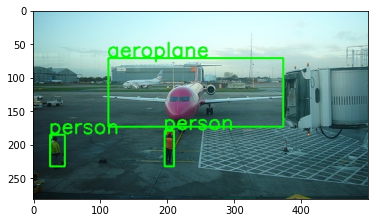

In [16]:
combineImageAndPrediction('salida/yolov3/2007_000032.jpg','salida/yolov3/2007_000032.xml')
showImage('prediction.jpg')

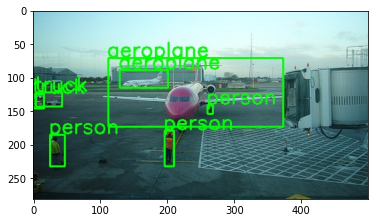

In [12]:
combineImageAndPrediction('salida/output/2007_000032.jpg','salida/output/2007_000032.xml')
showImage('prediction.jpg')

# Test-time ensembling

In [6]:
import testTimeAugmentation
import function
import os
import shutil
import argparse
import ensembleOptions
from mainModel import models
from imutils import paths
import warnings
warnings.filterwarnings('ignore')

pathImg = 'Images/'
option = "unanimous"

yoloDarknet = testTimeAugmentation.DarknetYoloPred('weights/yolov3.weights', 'weights/coco.names', 'weights/yolov3.cfg')

listaModels = [yoloDarknet]
models(listaModels, pathImg, option)

TypeError: predict() missing 1 required positional argument: 'conf'

In [ ]:
# TODO After ensembling the models, we can also run ensembles on test-time augmentation afterwards!

# http://35.185.10.67:8888/edit/ensembler/ensembleObjectDetection/TestTimeAugmentation/mainTTA.py